# Multi-Class Logistic Regression

<!-- <img src='https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png' width=800> -->
<img src='https://d3i3l3kraiqpym.cloudfront.net/wp-content/uploads/2016/04/26094914/Ad%C3%A9lie-Chinstrap-and-gentoo-penguin-species.jpg' width=800>
<img src='https://www.louisaslett.com/StatML/notes/i/palmerpenguins_culmen_depth.png' width=745>

## 1. Do an exploratory data analysis on the penguins dataset from seaborn library.

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import warnings

from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

warnings.filterwarnings('ignore')


In [125]:
penguins = sns.load_dataset("penguins")
penguins.sample(20)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
145,Adelie,Dream,39.0,18.7,185.0,3650.0,Male
262,Gentoo,Biscoe,45.3,13.7,210.0,4300.0,Female
45,Adelie,Dream,39.6,18.8,190.0,4600.0,Male
183,Chinstrap,Dream,54.2,20.8,201.0,4300.0,Male
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
126,Adelie,Torgersen,38.8,17.6,191.0,3275.0,Female
162,Chinstrap,Dream,46.6,17.8,193.0,3800.0,Female
36,Adelie,Dream,38.8,20.0,190.0,3950.0,Male
149,Adelie,Dream,37.8,18.1,193.0,3750.0,Male
319,Gentoo,Biscoe,51.1,16.5,225.0,5250.0,Male


In [105]:
penguins.shape

(344, 7)

In [106]:
penguins.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [107]:
# Fill the missing value with forward fill
penguins.fillna(method="ffill", inplace=True)

In [108]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [109]:
penguins.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [110]:
penguins.select_dtypes(exclude="object").corr().style.background_gradient(cmap="coolwarm")

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.237563,0.656864,0.596365
bill_depth_mm,-0.237563,1.000000,-0.585477,-0.474244
flipper_length_mm,0.656864,-0.585477,1.000000,0.870961
body_mass_g,0.596365,-0.474244,0.870961,1.000000


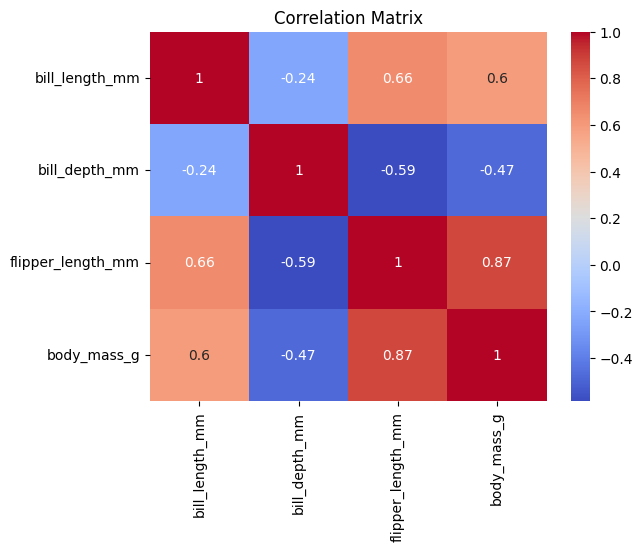

In [111]:
sns.heatmap(penguins.select_dtypes(exclude="object").corr(), annot=True, cmap="coolwarm");
plt.title("Correlation Matrix");

In [112]:
penguins['species'].value_counts().sort_values(ascending=False)

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

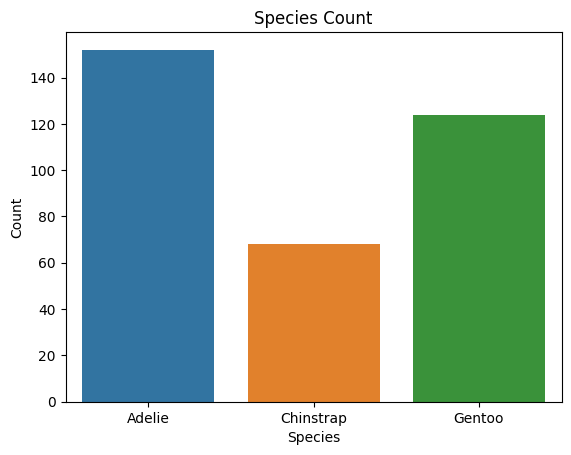

In [113]:
sns.countplot(data=penguins, x='species', hue='species')

plt.title("Species Count");
plt.xlabel("Species");
plt.ylabel("Count");
plt.show()

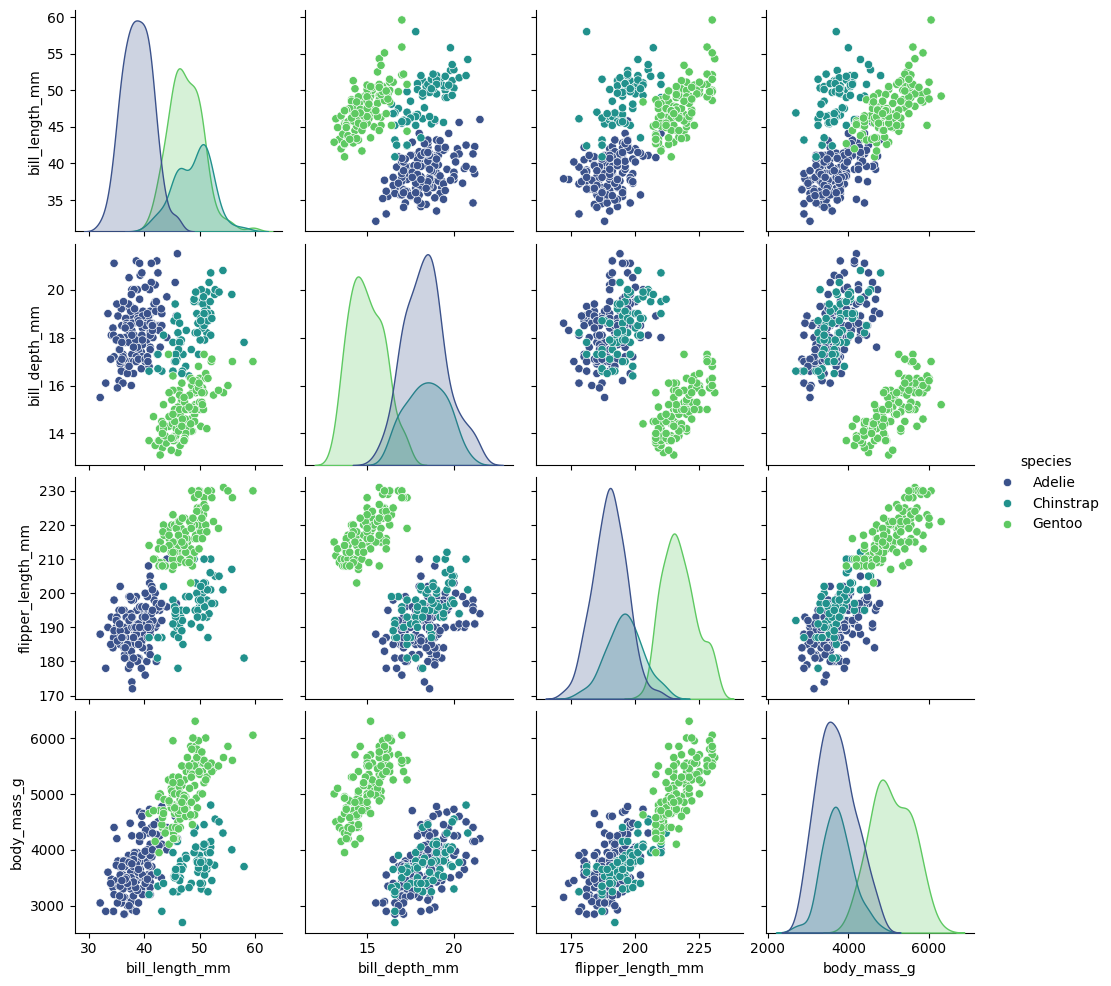

In [114]:
sns.pairplot(penguins, hue='species', palette='viridis');

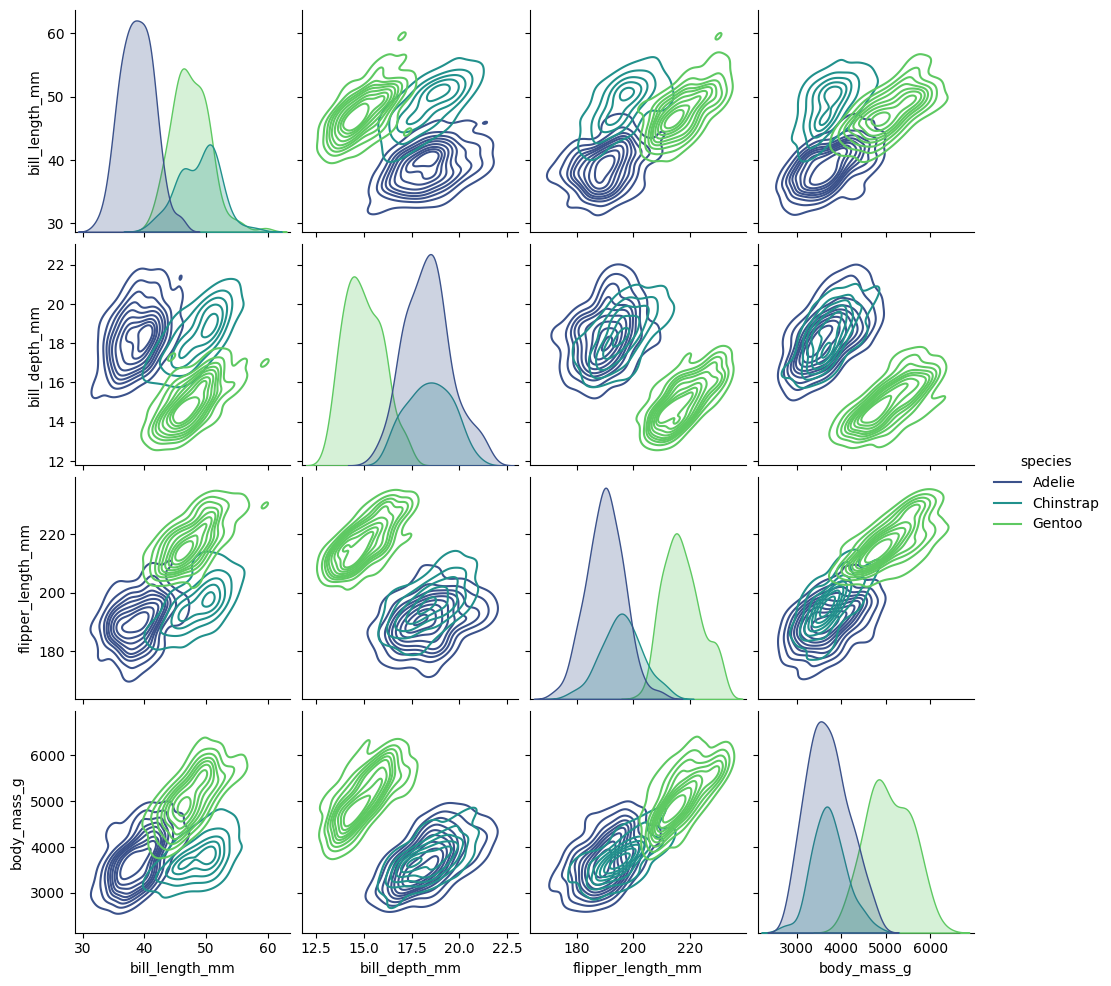

In [115]:
sns.pairplot(penguins, hue='species', palette='viridis', kind='kde');

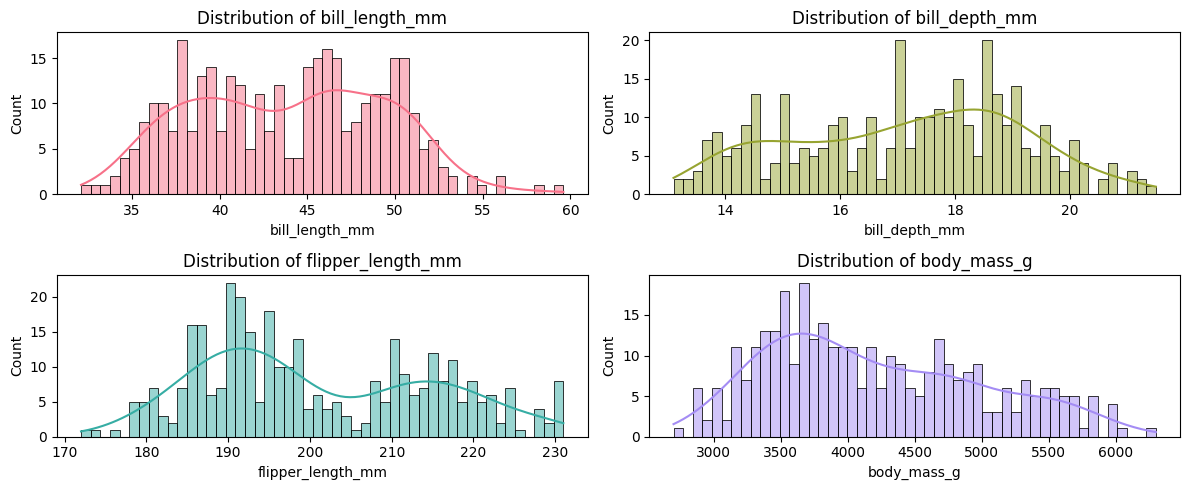

In [116]:
names = penguins.select_dtypes(include='float64').columns.tolist()
colors = sns.color_palette("husl", len(names))
fig, ax = plt.subplots(2, 2, figsize=(12, 5))
ax = ax.flatten()  # Flatten the array of axes
i = 0
for var, color in zip(names, colors):
    sns.histplot(penguins, x=var, kde=True, ax=ax[i], bins=50, color=color)
    ax[i].set_title(f"Distribution of {var}")
    i += 1
plt.tight_layout()

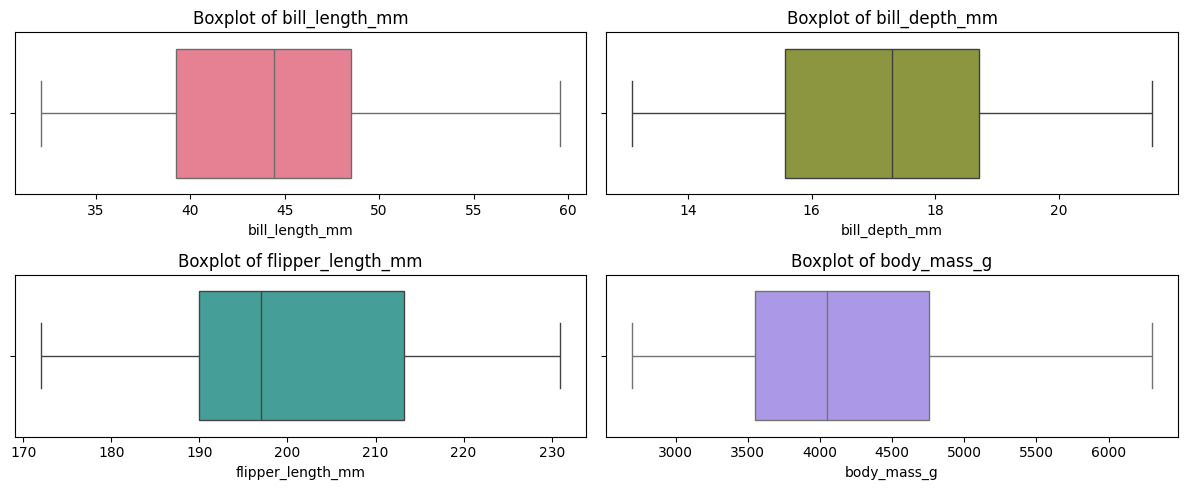

In [117]:
names = penguins.select_dtypes(include='float64').columns.tolist()
colors = sns.color_palette("husl", len(names))
fig, ax = plt.subplots(2, 2, figsize=(12, 5))
ax = ax.flatten()  # Flatten the array of axes
i = 0
for var, color in zip(names, colors):
    sns.boxplot(penguins, x=var, ax=ax[i], color=color)
    ax[i].set_title(f"Boxplot of {var}")
    i += 1
plt.tight_layout()

## 2. First use scikit-learn and next use PyTorch to build multi-class logistic regression and do all the neccessary things in machine learning process.
* Features: `island`, `bill_length_mm`, `bill_depth_mm`, `flipper_length_mm`, `body_mass_g`, `sex`
* Target: `species`

### Sklearn

In [118]:
# Encode categorical features
penguins['sex'] = LabelEncoder().fit_transform(penguins['sex'].astype(str))
penguins['island'] = LabelEncoder().fit_transform(penguins['island'])

# Separate features and target
X = penguins[['island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']]
y = penguins['species']

# Encode target
y = LabelEncoder().fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Save the scaler
import joblib
joblib.dump(
    scaler,
    '/Users/mac/Desktop/Home/Year 5/NLP/NLP-Project/src/P1/PDS-Regression/model/scaler_penguins_model.pkl'
)

# Train logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500)
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        32
           1       1.00      0.94      0.97        16
           2       1.00      1.00      1.00        21

    accuracy                           0.99        69
   macro avg       0.99      0.98      0.98        69
weighted avg       0.99      0.99      0.99        69

Accuracy: 0.9855072463768116


### PyTorch

In [119]:
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

# Define the model
class MultiClassLogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(MultiClassLogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        return self.linear(x)

input_dim = X_train.shape[1]
output_dim = len(set(y))
multi_model = MultiClassLogisticRegressionModel(input_dim, output_dim)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(multi_model.parameters(), lr=0.01)

# Training loop
for epoch in range(100):
    for X_batch, y_batch in train_loader:
        outputs = multi_model(X_batch)
        loss = criterion(outputs, y_batch)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch {epoch+1}, Loss: {loss.item():.4f}')

# Evaluate on test data
with torch.no_grad():
    y_test_pred = multi_model(X_test_tensor)
    y_test_pred = torch.argmax(y_test_pred, axis=1)
    accuracy = (y_test_pred == y_test_tensor).float().mean()
    print(f"Test Accuracy: {accuracy.item():.4f}")


Epoch 10, Loss: 0.3648
Epoch 20, Loss: 0.1340
Epoch 30, Loss: 0.2559
Epoch 40, Loss: 0.1279
Epoch 50, Loss: 0.0365
Epoch 60, Loss: 0.5655
Epoch 70, Loss: 0.0334
Epoch 80, Loss: 0.0428
Epoch 90, Loss: 0.0990
Epoch 100, Loss: 0.0690
Test Accuracy: 0.9855


## 3. Select only some important features with reasonable tools and reasonings and repeat question 2.

Correlation with Target (species):
 species              1.000000
island               0.008864
bill_length_mm       0.731936
bill_depth_mm       -0.745287
flipper_length_mm    0.854414
body_mass_g          0.752041
sex                  0.009174
Name: species, dtype: float64


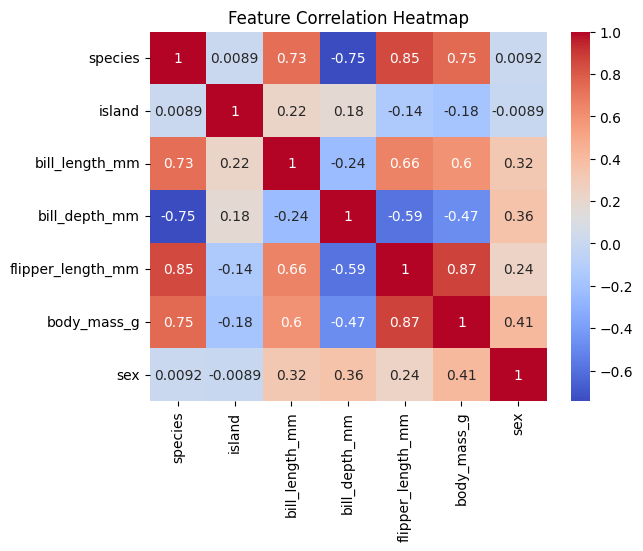

Feature Importance (Mutual Information):
flipper_length_mm    0.603245
bill_depth_mm        0.573780
bill_length_mm       0.563186
island               0.512206
body_mass_g          0.486198
sex                  0.083937
dtype: float64


In [120]:
from sklearn.feature_selection import mutual_info_classif

# Reload dataset (clean and preprocess)
penguins = sns.load_dataset('penguins')
penguins.fillna(method='ffill', inplace=True)

# Encode categorical features for correlation analysis
penguins['sex'] = penguins['sex'].map({'Male': 1, 'Female': 0})
penguins['island'] = penguins['island'].map({'Torgersen': 0, 'Biscoe': 1, 'Dream': 2})

# Encode target variable
penguins['species'] = LabelEncoder().fit_transform(penguins['species'])

# Correlation matrix
corr_matrix = penguins.corr()
print("Correlation with Target (species):\n", corr_matrix['species'])

# Visualize correlations
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# Use mutual information for feature importance
X = penguins[['island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']]
y = penguins['species']
mutual_info = mutual_info_classif(X, y, random_state=42)

feature_importance = pd.Series(mutual_info, index=X.columns).sort_values(ascending=False)
print(f"Feature Importance (Mutual Information):\n{feature_importance}")

#### retrain

In [121]:
# Select important features based on the analysis
mutual_selected_features = ['bill_length_mm', 'flipper_length_mm', 'bill_length_mm', 'island']
# corr_selected_features = ['body_mass_g', 'flipper_length_mm', 'bill_length_mm']
X_selected = penguins[mutual_selected_features]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train logistic regression model
re_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500)
re_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = re_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        32
           1       1.00      0.94      0.97        16
           2       1.00      1.00      1.00        21

    accuracy                           0.99        69
   macro avg       0.99      0.98      0.98        69
weighted avg       0.99      0.99      0.99        69

Accuracy: 0.9855072463768116


In [122]:
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

input_dim = X_train_tensor.shape[1]
output_dim = len(set(y_train))
retrain_model = MultiClassLogisticRegressionModel(input_dim, output_dim)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(retrain_model.parameters(), lr=0.01)

# Training loop
for epoch in range(100):
    for X_batch, y_batch in train_loader:
        outputs = retrain_model(X_batch)
        loss = criterion(outputs, y_batch)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch {epoch+1}, Loss: {loss.item():.4f}')

# Evaluate on test data
with torch.no_grad():
    y_test_pred = retrain_model(X_test_tensor)
    y_test_pred = torch.argmax(y_test_pred, axis=1)
    accuracy = (y_test_pred == y_test_tensor).float().mean()
    print(f"Test Accuracy: {accuracy.item():.4f}")

Epoch 10, Loss: 0.4251
Epoch 20, Loss: 0.4302
Epoch 30, Loss: 0.2264
Epoch 40, Loss: 0.3363
Epoch 50, Loss: 0.2696
Epoch 60, Loss: 0.2275
Epoch 70, Loss: 0.0922
Epoch 80, Loss: 0.1304
Epoch 90, Loss: 0.1509
Epoch 100, Loss: 0.1348
Test Accuracy: 0.9710


# 4. Save model for streamlit

In [123]:
# Save model both sklearn and PyTorch
import joblib

# Save the sklearn numti-class logistic regression model
joblib.dump(
    model, 
    '/Users/mac/Desktop/Home/Year 5/NLP/NLP-Project/src/P1/PDS-Regression/model/sklearn_penguins_model.pkl'
)

# Save the PyTorch multi-class logistic regression model
torch.save(
    obj=multi_model.state_dict(),
    f='/Users/mac/Desktop/Home/Year 5/NLP/NLP-Project/src/P1/PDS-Regression/model/pytorch_penguins_model.pkl'
)
